In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [44]:
data = pd.read_csv("C:/Users/pranay/Downloads/Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [45]:
data['Sales'].value_counts()

7.80    4
6.20    3
6.67    3
8.77    3
6.88    3
       ..
7.50    1
8.89    1
7.58    1
5.64    1
8.14    1
Name: Sales, Length: 336, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])
data['ShelveLoc'].unique()
data['Urban'].unique()
data['US'].unique()
#data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [77]:
data=data.assign(Sale=pd.cut(data['Sales'], 
                               bins=[ 0, 4, 9,15], 
                               labels=['Low', 'Medium', 'High']))
data['Sale'] = label_encoder.fit_transform(data['Sale'])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0,2


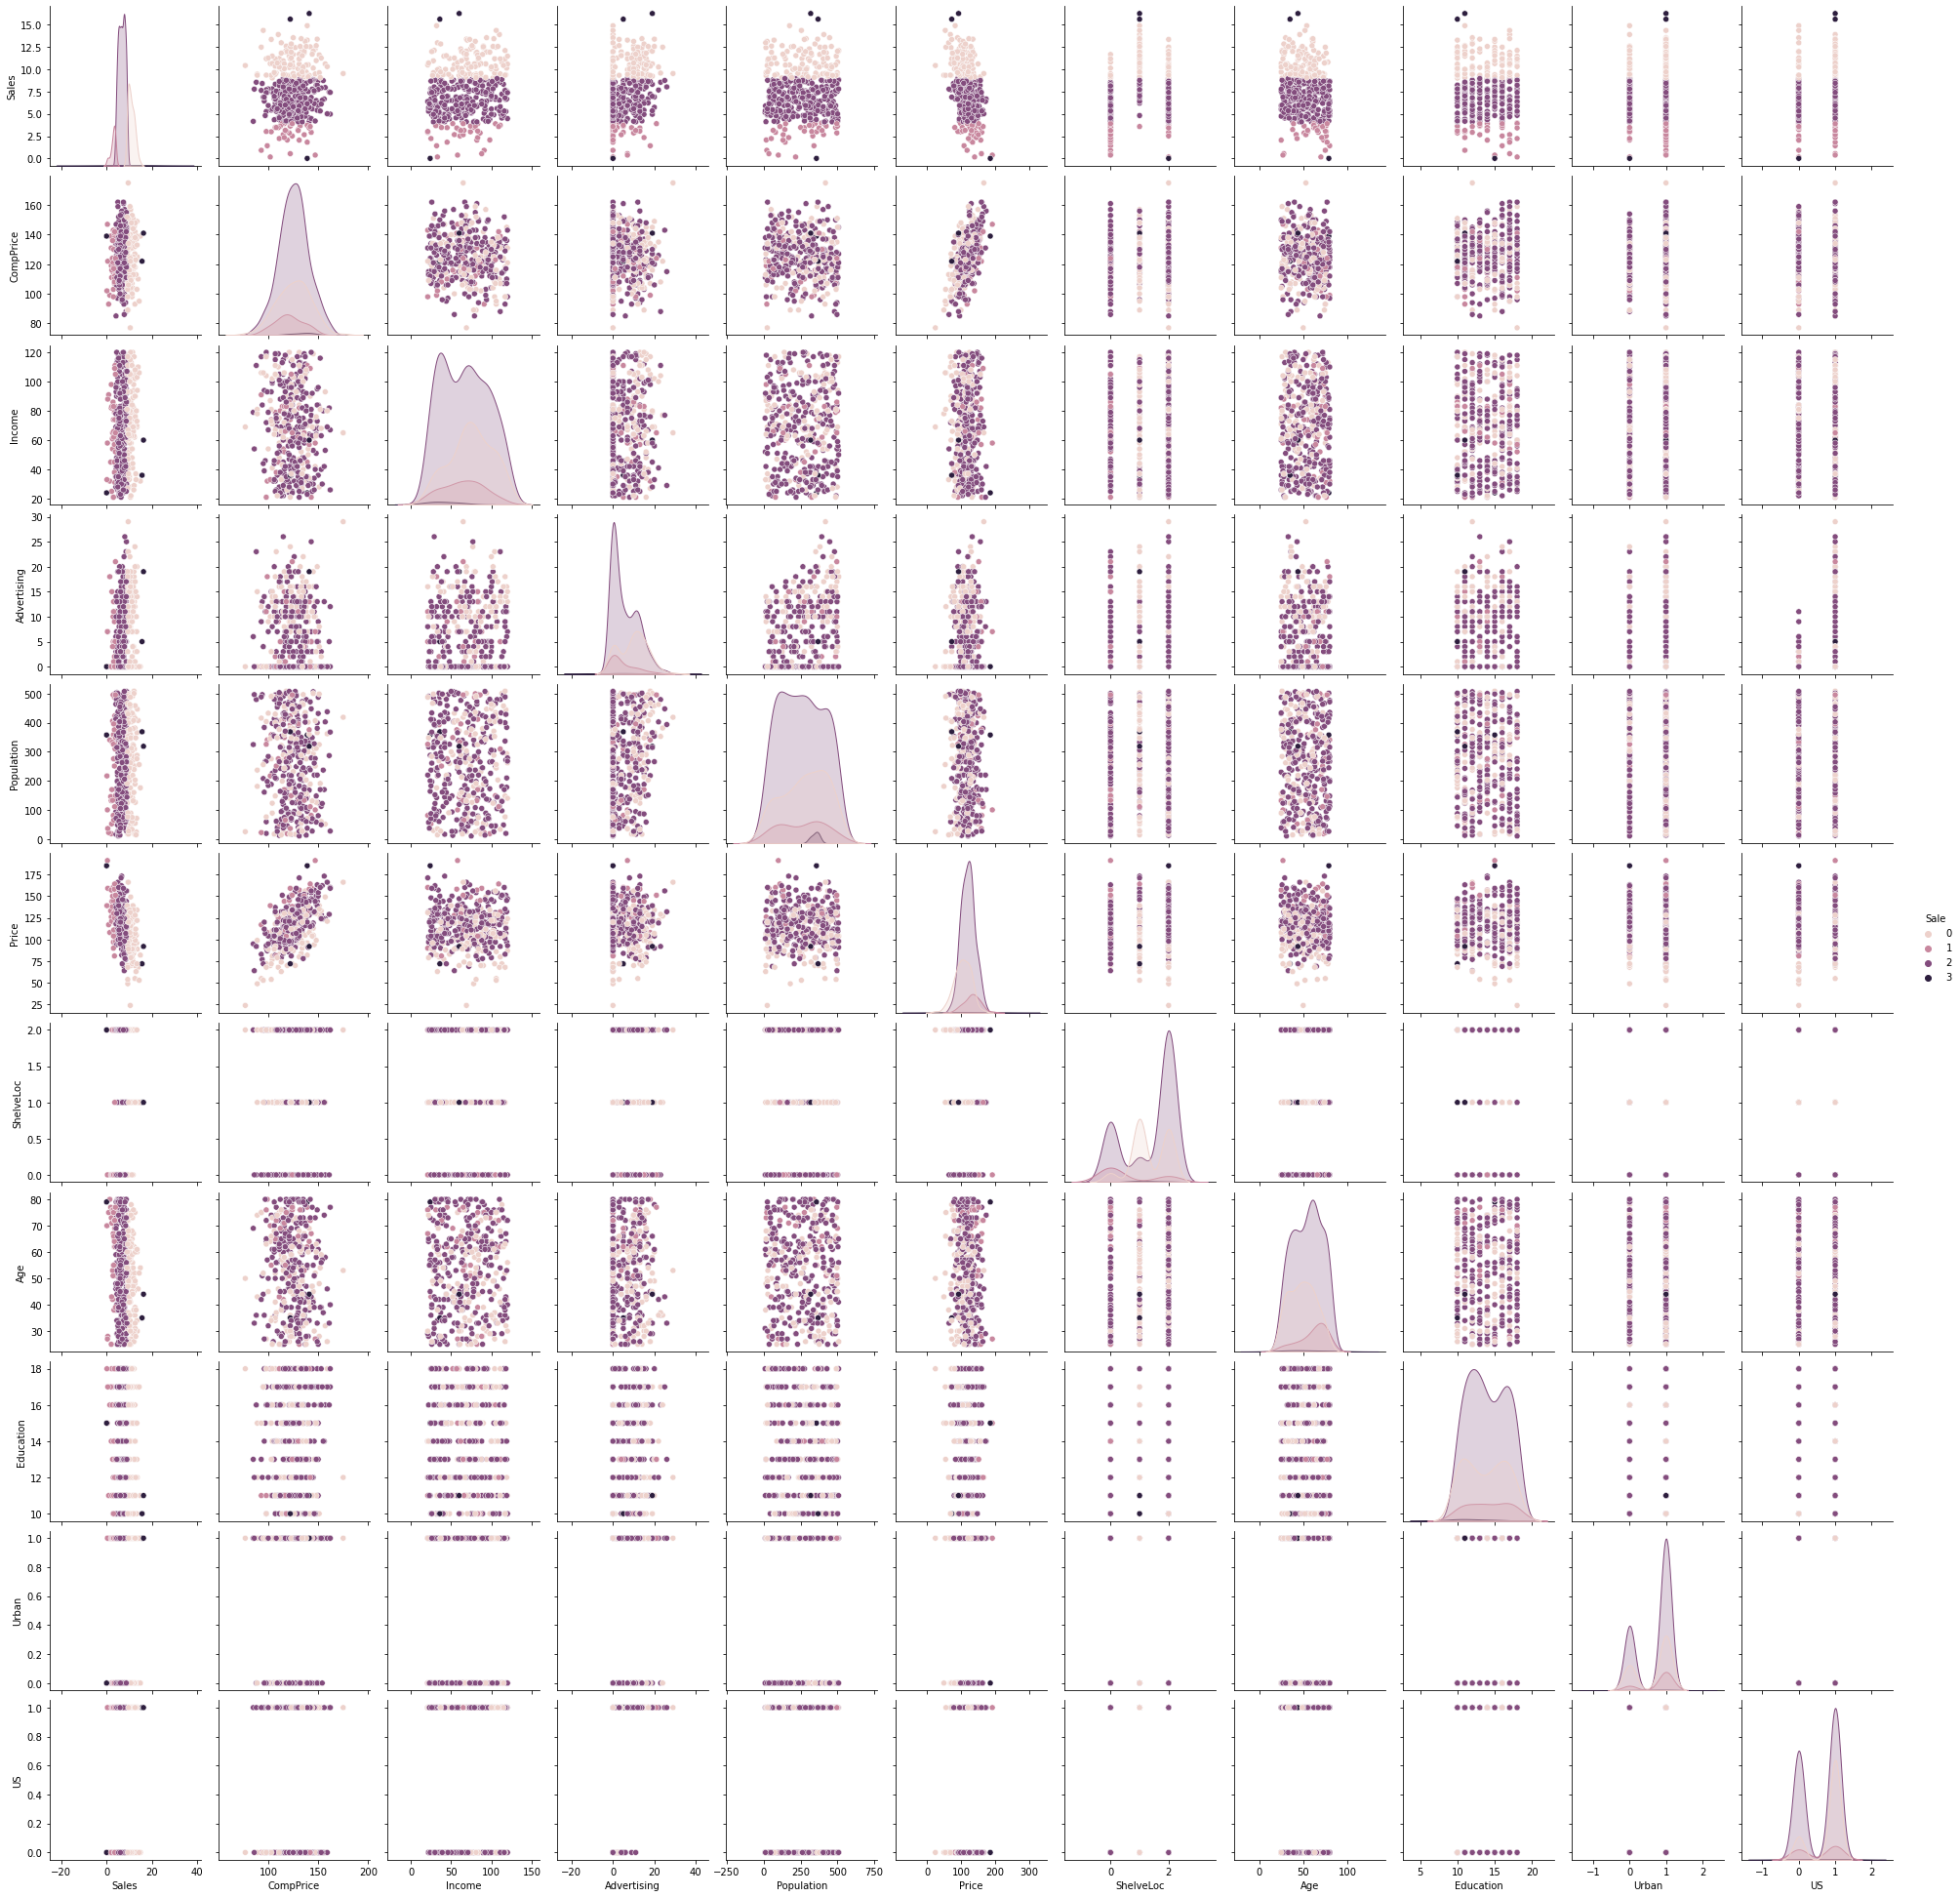

In [99]:
import seaborn as sns
sns.pairplot(data=data, hue = "Sale")

In [78]:
X = data.iloc[:,1:11]
Y = data['Sale']

In [79]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [80]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=40)

## Decision Tree using Entropy

In [95]:
model  = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

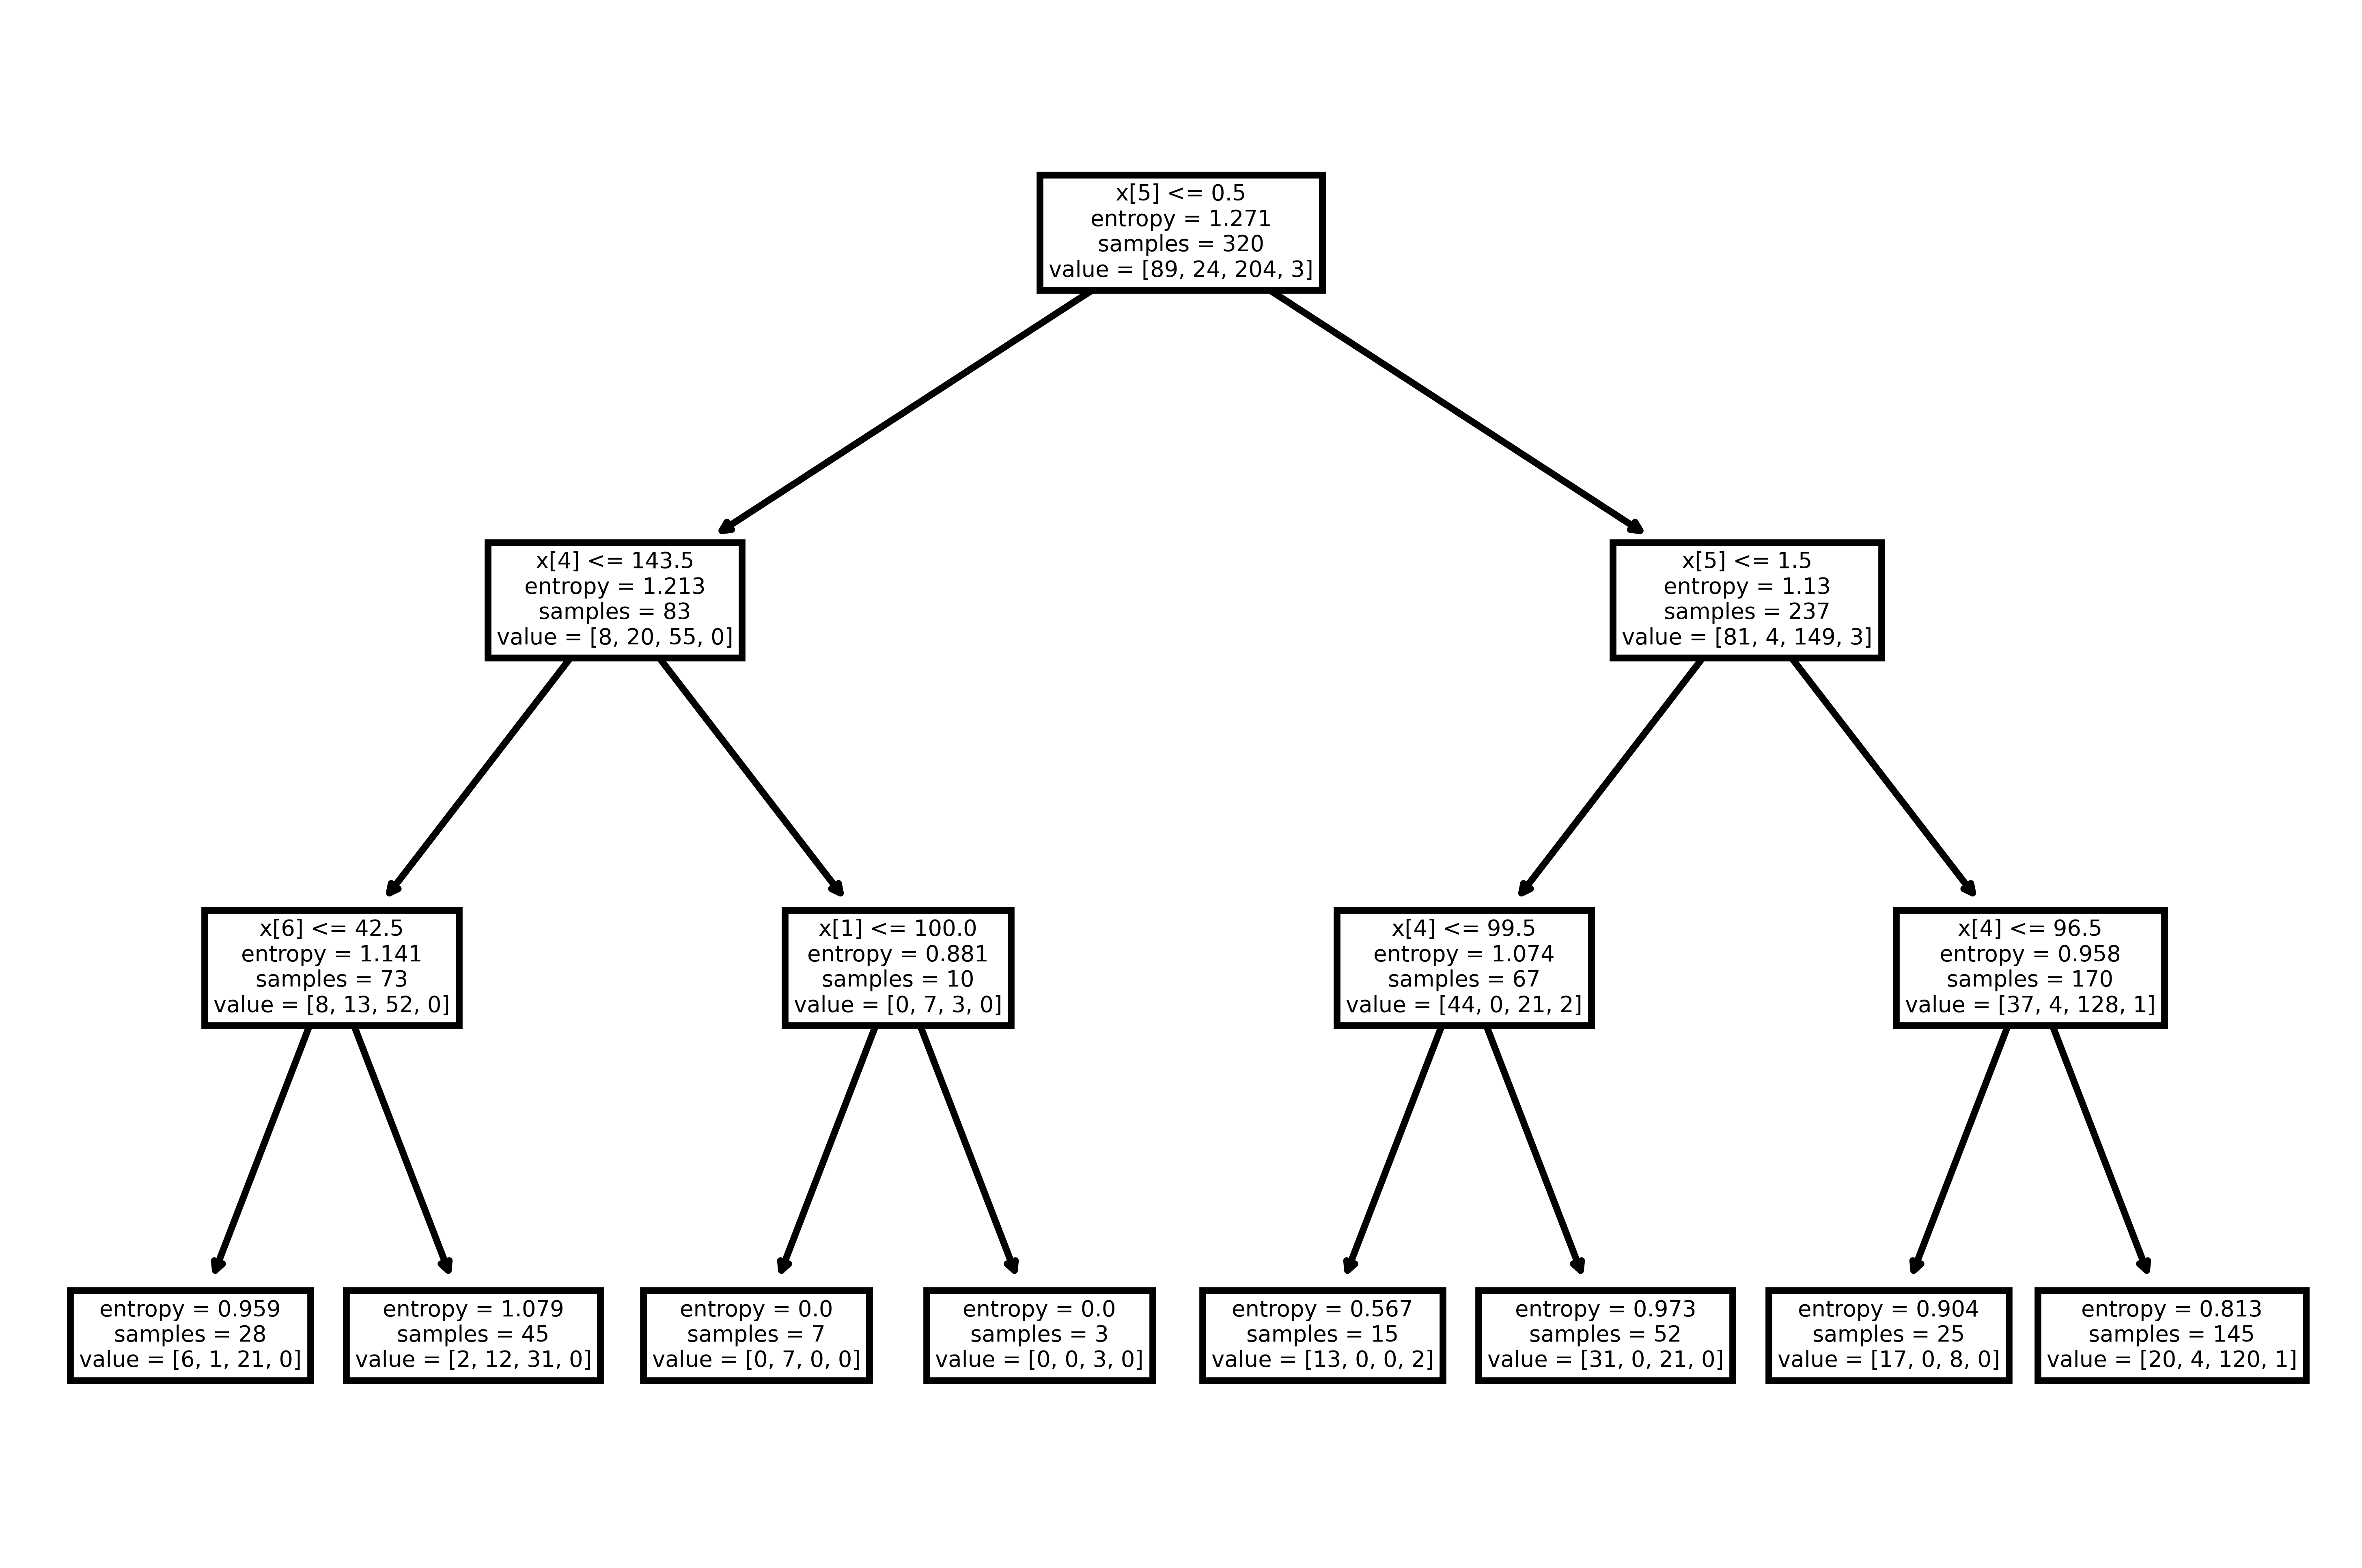

In [96]:
#to plot decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

In [97]:
preds = model.predict(x_test)
preds

array([0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2])

In [98]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.58      0.82      0.68        22
           1       0.00      0.00      0.00        11
           2       0.71      0.72      0.72        47

    accuracy                           0.65        80
   macro avg       0.43      0.51      0.47        80
weighted avg       0.58      0.65      0.61        80



Text(0.5, 1.0, 'Accuracy Score: 0.625')

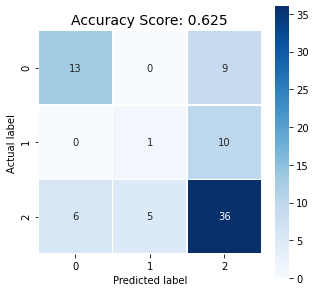

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 14)

# Gini Score

In [100]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [101]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [102]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.65

## Bagging

In [103]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [104]:
X1 = data.iloc[:,1:11]
Y1 = data['Sale']
seed = 7

In [105]:
kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100

model1 = BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=seed)
results = cross_val_score(model1,X1,Y1,cv=kfold)
print(results.mean())

C:\Users\pranay\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\pranay\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\pranay\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\pranay\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\pranay\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` 

0.7424999999999999


## Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10,random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
results = cross_val_score(model,X1,Y1,cv=kfold)
print(results.mean())

0.7525000000000001


## Adaboost

In [110]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
X1 = data.iloc[:,1:11]
Y1 = data['Sale']


kfold = KFold(n_splits=20, random_state=7, shuffle = True)
model = AdaBoostClassifier(n_estimators=20,random_state=7)
results = cross_val_score(model,X1,Y1,cv=kfold)
print(results.mean())

0.6375
